In [1]:
import numpy as np

class AgglomerativeClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.labels = None

    def fit(self, X):
        # Initialize each sample as a separate cluster
        n_samples = X.shape[0]
        clusters = [[i] for i in range(n_samples)]

        while len(clusters) > self.n_clusters:
            # Calculate pairwise distances between clusters
            distances = np.zeros((len(clusters), len(clusters)))
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    dist = self._calculate_distance(X[clusters[i]], X[clusters[j]])
                    distances[i, j] = dist
                    distances[j, i] = dist

            # Find the closest pair of clusters
            min_dist = np.min(distances[np.nonzero(distances)])
            cluster_indices = np.where(distances == min_dist)
            cluster1_index, cluster2_index = cluster_indices[0][0], cluster_indices[1][0]

            # Merge the closest pair of clusters
            clusters[cluster1_index].extend(clusters[cluster2_index])
            del clusters[cluster2_index]

        self.labels = np.zeros(n_samples, dtype=int)
        for cluster_index, cluster in enumerate(clusters):
            self.labels[cluster] = cluster_index

    def _calculate_distance(self, cluster1, cluster2):
        # Single-linkage distance (minimum distance)
        min_dist = float('inf')
        for sample1 in cluster1:
            for sample2 in cluster2:
                dist = np.linalg.norm(sample1 - sample2)
                if dist < min_dist:
                    min_dist = dist
        return min_dist


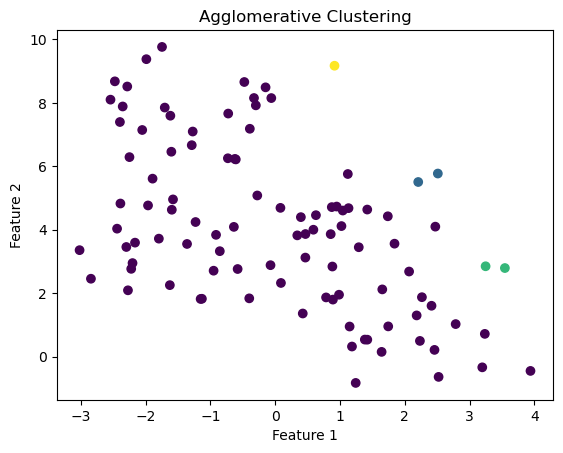

In [2]:
# Example usage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate some random data
X, _ = make_blobs(n_samples=100, centers=4, random_state=0)

# Create an instance of AgglomerativeClustering and fit the data
clustering = AgglomerativeClustering(n_clusters=4)
clustering.fit(X)

# Get the cluster labels assigned to each sample
labels = clustering.labels

# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
